## Nivell1
### Exercici 1
***Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.***

***Agafem la mitja d'alçada per quip de les ultimres 4 temporades***
***Hipotesis nula es la mitjana d'alçada ha augmentat***
***Hipotesis alternativa  es la mitjana d'alçada ha augmentat***

In [1]:
#Importem les llibreries i veiem diferents propietats
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# llegim fitxer de dades
nbaPlayersDf=pd.read_csv('all_seasons.csv',index_col=False,sep=',', encoding='utf8')

***Es tracta  veure si la alçada promig d'un equip ha aumentat o disminuit la temporada 2020-21 respecte de l'alçada promig del registre històric.***

***Del conjunt de dades de la nba temporada a temporada i jugador per jugador fem el seguent:***
* 1 Agrupem els jugadors per temporada y equip 
* 2 Calculem l'alçada mitjane de totes el jugadors d'un equip
* 3 Calculem la mitjana i la desviació standard del pas 2 , amb això tindrem la poblacio
* 4 Extraiem la nostra mostra: temporada 2020-21, equip, alçada mitjana

**HIPOTESI**

***Ens preguntem si l'alçada mitjana del jugadors de la NBA ha varianf la temporada 2020-21 comparat al el històric***
***Las dades històriques son mitjana 200.77 , std=1.45 , ho calculem a partir de les dades històriques***

***H0=La alçada mitjana dels equips de la  NBA la temporada 2021-21 (200.7 cm) no ha variat significativamente respecte*** ***l'alçada mitja de totes temporades registrades***

***H1=La alçada muitjana dels equips de la  NBA la temporada 2021-21 (200.7 cm)   ha variat***

***Confiança 5% (0.05)

***En aquest cas el P-Value es per two-tailed jas que es planteja que kla mitjana es defiverent , por ser menor o mnajor***





In [3]:
last1Season=nbaPlayersDf.season.isin(["2020-21"])

In [4]:
#agafem les dade que interessen
dadesAlcades=nbaPlayersDf[['season','team_abbreviation','player_height']]


In [5]:
#poblacio=dataHeight.groupby(['team_abbreviation'])['player_height'].mean() 
poblacio=dadesAlcades.groupby(['season','team_abbreviation'])['player_height'].mean() 

In [6]:
mitjaPoblacio = np.mean(poblacio)
stdPoblacio= np.std(poblacio)

***Calculem mitja i desviacio standard de la població***

In [7]:
print("Alçada mitjana equip últimes 5 temporades  = {0} \nDescviacio Standard {1}".format(mitjaPoblacio,stdPoblacio))

Alçada mitjana equip últimes 5 temporades  = 200.7657757155917 
Descviacio Standard 1.4505911526164967


In [8]:
#Generem la mostra de al poblacio que es la temporada 2020-21
dadesAlcades=nbaPlayersDf[last1Season][['season','team_abbreviation','player_height']]
mostra=dadesAlcades.groupby(['season','team_abbreviation'])['player_height'].mean() 

***Analtzem i la mostra te una distribució normal amb diferents proves***

In [9]:
#Prova shapiro
stat, pValue = stats.shapiro(mostra)

print('stat=%.3f, p=%.3f' % (stat, p))
if pValue > 0.05: print('Probablement Normal')
else: print('Probablement No Normal')

NameError: name 'p' is not defined

In [ ]:
#primerament mirem el tipus de distribució dels xuts
sns.set_style("whitegrid")
ax = sns.boxplot( data=mostra,  fliersize=7,  orient='h', linewidth=1 , width=.4)
plt.show()

***Calculem les dades per obtenir el T-SCORE***

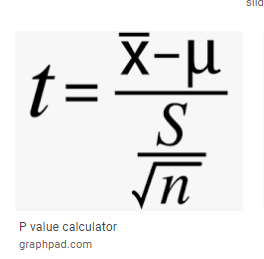


In [ ]:

#calculem valors estadístics de la mostra
mitjaMostra = np.mean(mostra)
elements = mostra.size
tValue=(mitjaMostra-mitjaPoblacio)/(stdPoblacio/np.sqrt(elements))

print("n = {0}\nMitjana poblacional  = {1}\nMitjana mostra {2}\nDesviació estàndard = {3}\n".format(elements, mitjaPoblacio, mitjaMostra, stdPoblacio))
print("t-value = {0}".format(tValue))

***Ara calcumlem lárea de probabilitat pel t-value amb scipy***

In [ ]:
print(pValue)


In [ ]:
#amb scipy podem calcular la p que ens dirà el risc que asumim si refutem la hipòtesi nula, o el que es el mateix, 
#la probabilitat o àrea de - infinit a t
pValue=2*stats.t.cdf(x=tValue,df=elements-1)
print(pValue)       
if pvalue < 0.05:
    print("La Hipotesis nula te una probabilitat molt menor a la nostra alfa 0.05%, podem refutar hipotesis nula")
else:
     print("La Hipotesis nula es correcte")

***CONCLUSIO***

* ***La  hipòtesi nula tindria una probabilitat  molt mes baixa que el 0.05 % (5%), P-Value < 0.05 es pot concloure que ell ris de rebatre la hipoteis nul.la es assumible, Refutem la hipòtesis nula :Podem afirmar que l'alçada mitjana dels equips a la temporada 2020_21 ha variat respecte la mitjana del historic de la població canviat, en el cas de la mostra ha baixat***


## Nivell 2
### Exercici 2
***Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.***

***Hipotesis es que els jugadors que donen mes assitències fan mes punts tambè.***

* ***H0: Les assistències i punts anotat per partits de un jugador  mostres son independents. No hi ha relació entre assistències i els punts anotats***
* ***Ha: existeix una dependencia entre assistències i i els punts anotats***



***Desde el dataset original agafem les dues mostres***
* Punts i assitencies per jugador per temporada a les últimes 5 temporades


In [36]:
#Prenem la mostra de les 5 últimes temporades

last5Season=nbaPlayersDf.season.isin(["2016-17","2017-18","2018-19","2019-20","2020-21",])
last1Season=nbaPlayersDf.season.isin(["2020-21"])
astVsPtsDf=nbaPlayersDf[last5Season][['season','player_name','ast','pts']]



In [ ]:
astMean=pd.DataFrame(nbaPlayersDf[last5Season][['season','player_name','ast','pts']].groupby(['season','player_name'])['ast'].mean()) 
astMean=astMean.reset_index()
pstMean=pd.DataFrame(nbaPlayersDf[last5Season][['season','player_name','ast','pts']].groupby(['season','player_name'])['pts'].mean())
pstMean=pstMean.reset_index()
astVsPtsDf=pd.concat([astMean,pstMean],axis=1)

In [24]:
astMean

,season,player_name,ast
0,2016-17,AJ Hammons,0.2
1,2016-17,Aaron Brooks,1.9
2,2016-17,Aaron Gordon,1.9
3,2016-17,Aaron Harrison,0.6
4,2016-17,Adreian Payne,0.4
...,...,...,...
2620,2020-21,Yogi Ferrell,2.2
2621,2020-21,Yuta Watanabe,0.8
2622,2020-21,Zach LaVine,4.9
2623,2020-21,Zeke Nnaji,0.2


In [37]:
astVsPtsDf

,season,player_name,ast,pts
9075,2016-17,Marvin Williams,1.4,11.2
9076,2016-17,Mason Plumlee,3.5,10.4
9077,2016-17,Matt Barnes,2.6,7.1
9078,2016-17,Matthew Dellavedova,4.7,7.6
9079,2016-17,Maurice Harkless,1.1,10.0
...,...,...,...,...
11695,2020-21,Matthew Dellavedova,4.5,2.8
11696,2020-21,Maurice Harkless,1.2,5.2
11697,2020-21,Max Strus,0.6,6.1
11698,2020-21,Marcus Morris Sr.,1.0,13.4


In [38]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

***Comprovem si aquestes variables tenen u a distribució normal amb historgrama i qq grafica***
***Veiem que no tenen una distribució nomral***

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


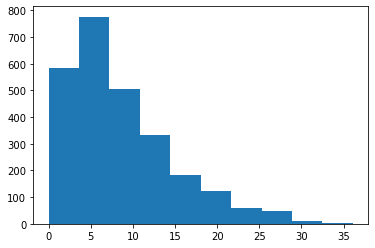

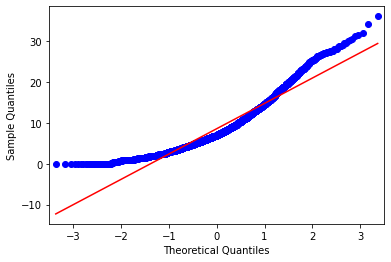

In [39]:
pyplot.hist(astVsPtsDf['pts'])
qqplot(astVsPtsDf['pts'],line='s')
pyplot.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


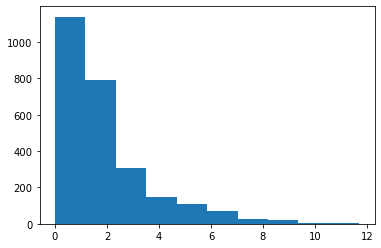

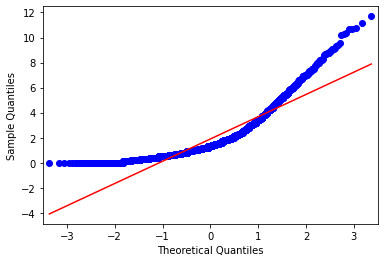

In [40]:
pyplot.hist(astVsPtsDf['ast'])
qqplot(astVsPtsDf['ast'], line='s')
pyplot.show()

***La distribució no es normal ,apliquem tests NO PARAMÈTRICS  mètode de Kruskal-Wallis i Spearman per veure les probabilitats P-VALUE***

In [42]:
# Apliquem the test de Kruskal-Wallis 
stat, pValue = stats.kruskal(astVsPtsDf['ast'], astVsPtsDf['pts'])
  
# Print the result
print("El resultat del test Kruskal-Wallis es : Stat ={0}, P-Value = {1}".format(stat,pValue))
if pValue > 0.05: print('Les assitències i les anotacions son probalement independent')
else: print('Les assitències i les anotacionbs son probalement dependent')

El resultat del test Kruskal-Wallis es : Stat =2454.7175195973364, P-Value = 0.0
Les assitències i les anotacionbs son probalement dependent


In [43]:
#Calculem amb Spearman
stat, pValue = stats.spearmanr(astVsPtsDf['ast'], astVsPtsDf['pts'])
print("El resultat del test Spearman es : Stat ={0}, P-Value = {1}".format(stat,pValue))
print('stat=%.3f, p=%.3f' % (stat, pValue))
if pValue > 0.05: print('Probablement independent')
else: print('Probablement dependent')

El resultat del test Spearman es : Stat =0.7610369415575367, P-Value = 0.0
stat=0.761, p=0.000
Probablement dependent


In [44]:
from pylab import *

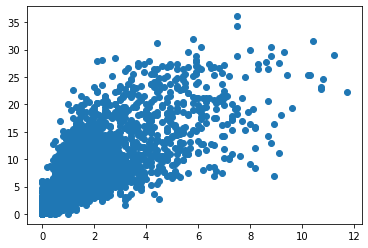

In [45]:
scatter(astVsPtsDf['ast'], astVsPtsDf['pts'])

In [46]:
np.corrcoef(astVsPtsDf['ast'], astVsPtsDf['pts'])

array([[1.        , 0.71014666],
       [0.71014666, 1.        ]])

**CONCLUSIÓ**

**El P-Value obtingut amb el mètode Kruskal-Wallis i Spearman mostres que les asistencies i punts son molt probablement***
depenents***

***Amb el grafic scatter i el coeficient de correlació tambè es pot afirmar que les moistres son probablement depenents***
***i per tant podem refutar la hipotesis nula***

## Nivell 3
### Exercici 3
***Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tre altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.***

***Volem saber si els colleges que tenem mes jugadors a la nba a les 5 últimes temprades tenen una mitjana de punts similar***

***HIPOTESIS***

* ***H0: lA mitajna de punts per partit dels jugadors procedents dels colleges sleccionats es similar.***
* ***Ha: LA mitjana de ppunts que aportant els jugadors dels colleges seleccionats es different, la procedència influeix".***


In [47]:
# Triem jugadors que a les 5 últimes temporades han jugat 50 partits o mes.
playerCollegeDf=pd.DataFrame(nbaPlayersDf[last5Season][['season','college','player_name','gp','pts']])
playerG50=playerCollegeDf.gp>50
playerCollegeDf=pd.DataFrame(playerCollegeDf[playerG50][['season','college','player_name','gp','pts']])

In [48]:
playerCollegeDf

,season,college,player_name,gp,pts
9075,2016-17,North Carolina,Marvin Williams,76,11.2
9076,2016-17,Duke,Mason Plumlee,81,10.4
9077,2016-17,UCLA,Matt Barnes,74,7.1
9078,2016-17,Saint Mary's (CA),Matthew Dellavedova,76,7.6
9079,2016-17,St. John's (NY),Maurice Harkless,77,10.0
...,...,...,...,...,...
11683,2020-21,None,Marc Gasol,52,5.0
11686,2020-21,Kansas,Markieff Morris,61,6.7
11692,2020-21,Duke,Mason Plumlee,56,10.4
11693,2020-21,Washington,Matisse Thybulle,65,3.9


In [49]:
#playerCollegeDF = pd.merge(left=collegeOrigin,right=collegePlayer, how='left', left_on='player_name', right_on='player_name')

***Triem els 3 colleges que aportan mes jugadors a la NBA***

In [50]:
playerCollegeDf['college'].value_counts().head(7)


None              261
Kentucky           89
Duke               64
UCLA               48
Kansas             44
North Carolina     42
Arizona            35
Name: college, dtype: int64

***Creem una mostra per college***

In [51]:
college1=playerCollegeDf.college.isin(["Kentucky"])
college2=playerCollegeDf.college.isin(["Duke"])
college3=playerCollegeDf.college.isin(["UCLA"])
college1Df=pd.DataFrame(playerCollegeDf[college1][['player_name','pts']].groupby(['player_name','pts'])['pts'].mean())
college2Df=pd.DataFrame(playerCollegeDf[college2][['player_name','pts']].groupby(['player_name','pts'])['pts'].mean())
college3Df=pd.DataFrame(playerCollegeDf[college3][['player_name','pts']].groupby(['player_name','pts'])['pts'].mean())


***Observem la distribució de les mostres , no semblen normals***

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


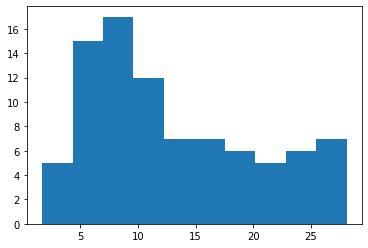

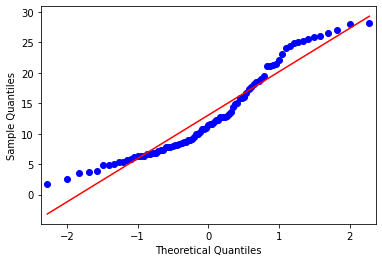

In [52]:
pyplot.hist(college1Df['pts'])
qqplot(college1Df['pts'], line='s')
pyplot.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


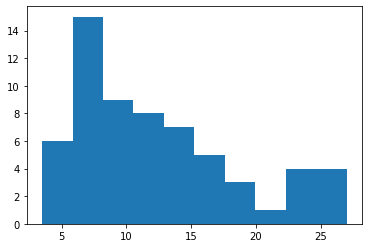

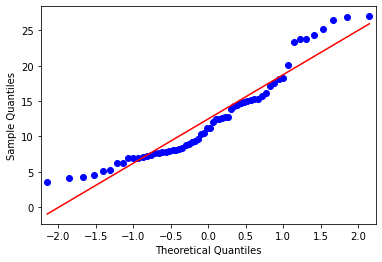

In [53]:
pyplot.hist(college2Df['pts'])
qqplot(college2Df['pts'], line='s')
pyplot.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


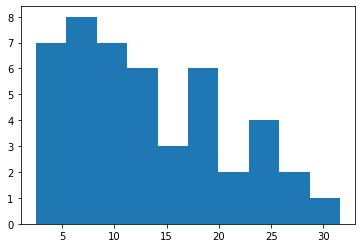

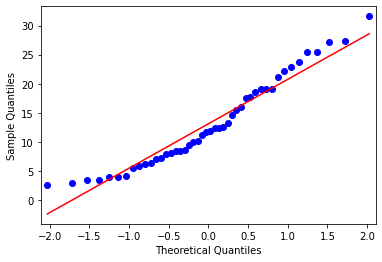

In [54]:
pyplot.hist(college3Df['pts'])
qqplot(college3Df['pts'], line='s')
pyplot.show()

***Apliquem mètode ANOVA one-way per veure si els jugadors aportats aportan una putuacio mijana per partit similar***

In [55]:
from scipy.stats import f_oneway

  
# Conduct the one-way ANOVA
f_oneway(college1Df, college2Df, college3Df)

F_onewayResult(statistic=array([0.14279015]), pvalue=array([0.86702796]))

***Apliquem mètode Kruskal per confirmar***

In [56]:

stat, p = stats.kruskal(college1Df['pts'], college2Df['pts'], college3Df['pts'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: print('Probablement la mateixa mediana')
else: print('Probablement NO tots tenen la mateixa mediana')

stat=0.060, p=0.970
Probablement la mateixa mediana


***CONCLUSIÓ***

***Ambdos mètodes mostren que la probabilitat de tenir un resultat con els de les mostres es supeiror ( 0.97 y 0.86)  al nostra alfa 0.5% , per tant acceptem la Hipotesis nula***

* ***H0: La mitajna de punts per partit dels jugadors procedents dels colleges sleccionats es similar.***
